# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [2]:
pip install keras

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ------------------------ --------------- 1.8/3.0 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 8.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.3 MB 11.2 MB/s eta 0:00:35
   ---------------------------------------- 3.7/390.3 MB 8.7 MB/s eta 0:00:45
    --------------------------------------- 5.0/390.3 MB 8.4 MB/s eta 0:00:46
    --------------------------------------- 6.6/390.3 MB 8.1 MB/s eta 0:00:48
    --------------------------------------- 8.1/390.3 MB 8.0 MB/s eta 0:00:48
    --------------------------------------- 9.4/390.3 MB 7.7 MB/s eta 0:00:50
   - -------------------------------------- 10.7/390.3 MB 7.6 MB/s eta 0:00:50
   - -------------------------------------- 12.3/390.3 MB 7.6 MB/s eta 0:00:50
   - -------------------------------------- 13.9/390.3 MB 7.6 MB/s eta 0:00:50
   - -------------------------------------- 15.5/390.3 MB 7.5 MB/s eta 0:00:51
   - -------------------------------------- 16.8/390.3 MB 7.4 MB/s eta 0:00:51
   - -------------------------------------- 18.1/390.3 MB 7.4 MB/

  You can safely remove it manually.
  You can safely remove it manually.


In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
data = pd.read_csv('pollution_dataset.csv')

In [3]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
data.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [5]:
def one_hot_encode_data(data: pd.DataFrame, columns: list):
    encoder = OneHotEncoder(sparse_output=False, drop=None)  
    data_copy = data.copy()

    for column in columns:
        one_hot = encoder.fit_transform(data_copy[[column]].astype(str))
        one_hot_cols = [f"{column}_{cat}" for cat in encoder.categories_[0]]
        one_hot_df = pd.DataFrame(one_hot, columns=one_hot_cols, index=data_copy.index)
        data_copy = pd.concat([data_copy.drop(column, axis=1), one_hot_df], axis=1)

    return data_copy
     


In [6]:
X, y = data.drop(columns=["Air Quality"]), data["Air Quality"]

In [7]:
y_encoded = one_hot_encode_data(y.to_frame(), ["Air Quality"])

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [9]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [10]:
model_shallow = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(16, kernel_initializer="uniform", activation="relu"),
    Dense(8, kernel_initializer="uniform", activation="relu"),
    Dense(y_encoded.shape[1], kernel_initializer="uniform", activation="softmax")
])


In [11]:
model_shallow.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [12]:
model_shallow.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model_medium = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, kernel_initializer="uniform", activation="swish"),
    Dropout(0.2),
    Dense(32, kernel_initializer="uniform", activation="swish"),
    Dense(16, kernel_initializer="uniform", activation="swish"),
    Dense(4, kernel_initializer="uniform", activation="softmax")
])

In [14]:
model_medium.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [15]:
model_medium.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,316 (12.95 KB)

 Trainable params: 3,316 (12.95 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model_deep = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, kernel_initializer="uniform", activation="tanh"),
    Dropout(0.3),
    Dense(64, kernel_initializer="uniform", activation="tanh"),
    Dense(32, kernel_initializer="uniform", activation="tanh"),
    Dense(16, kernel_initializer="uniform", activation="tanh"),
    Dense(4, kernel_initializer="uniform", activation="softmax")
])

In [17]:
model_deep.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [18]:
model_deep.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,212 (47.70 KB)

 Trainable params: 12,212 (47.70 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history_shallow = model_shallow.fit(
    train_X, train_y, 
    validation_split=0.1, epochs=64, batch_size=8
)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4192 - loss: 1.2652 - val_accuracy: 0.7600 - val_loss: 0.6833
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8354 - loss: 0.5563 - val_accuracy: 0.8900 - val_loss: 0.3957
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.3510 - val_accuracy: 0.9025 - val_loss: 0.3112
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9194 - loss: 0.2813 - val_accuracy: 0.9175 - val_loss: 0.2627
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.2438 - val_accuracy: 0.9175 - val_loss: 0.2448
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9309 - loss: 0.2204 - val_accuracy: 0.9250 - val_loss: 0.2219
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9276 - loss: 0.2063 - val_accuracy: 0.9175 - val_loss: 0.2206
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9279 - loss: 0.2017 - val_accuracy: 0.

In [20]:
history_medium = model_medium.fit(
    train_X, train_y, 
    validation_split=0.1, epochs=64, batch_size=8
)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4621 - loss: 1.1059 - val_accuracy: 0.8775 - val_loss: 0.4973
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.4629 - val_accuracy: 0.9200 - val_loss: 0.3156
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9192 - loss: 0.2969 - val_accuracy: 0.9250 - val_loss: 0.2283
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9215 - loss: 0.2338 - val_accuracy: 0.9250 - val_loss: 0.1987
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.1937 - val_accuracy: 0.9300 - val_loss: 0.1858
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9285 - loss: 0.1950 - val_accuracy: 0.9400 - val_loss: 0.1713
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.2055 - val_accuracy: 0.9400 - val_loss: 0.1651
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1805 - val_accuracy: 0.

In [21]:
history_deep = model_deep.fit(
    train_X, train_y, 
    validation_split=0.1, epochs=64, batch_size=8
)

Epoch 1/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5058 - loss: 1.0311 - val_accuracy: 0.8625 - val_loss: 0.4392
Epoch 2/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3863 - val_accuracy: 0.8300 - val_loss: 0.3290
Epoch 3/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.2953 - val_accuracy: 0.9225 - val_loss: 0.2488
Epoch 4/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.2365 - val_accuracy: 0.9300 - val_loss: 0.2030
Epoch 5/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.2181 - val_accuracy: 0.9275 - val_loss: 0.1989
Epoch 6/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9149 - loss: 0.2153 - val_accuracy: 0.9350 - val_loss: 0.1784
Epoch 7/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9265 - loss: 0.1993 - val_accuracy: 0.9250 - val_loss: 0.1994
Epoch 8/64
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.1922 - val_accuracy: 0.

<Axes: >

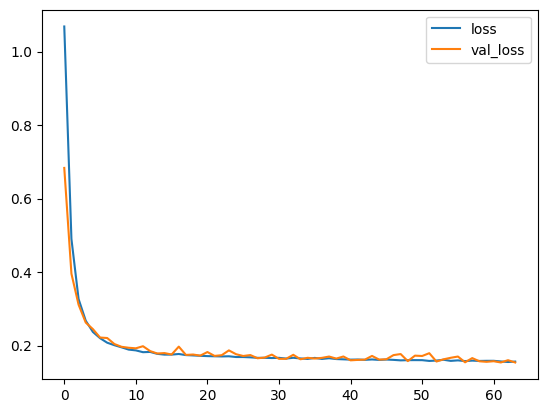

In [22]:
sns.lineplot(x=range(len(history_shallow.history['loss'])), y=history_shallow.history['loss'], label='loss')
sns.lineplot(x=range(len(history_shallow.history['val_loss'])), y=history_shallow.history['val_loss'], label='val_loss')


<Axes: >

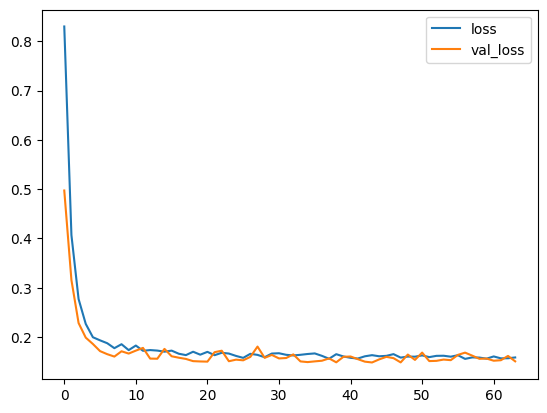

In [23]:
sns.lineplot(x=range(len(history_medium.history['loss'])), y=history_medium.history['loss'], label='loss')
sns.lineplot(x=range(len(history_medium.history['val_loss'])), y=history_medium.history['val_loss'], label='val_loss')


<Axes: >

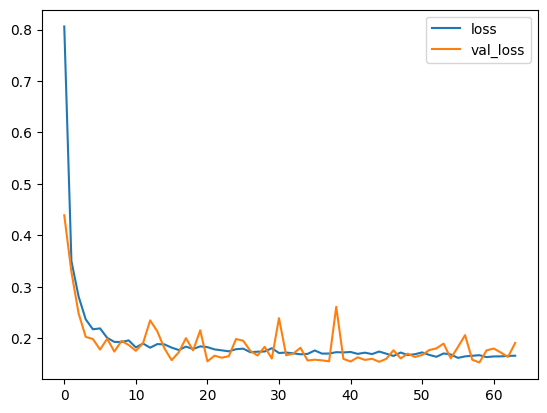

In [24]:
sns.lineplot(x=range(len(history_deep.history['loss'])), y=history_deep.history['loss'], label='loss')
sns.lineplot(x=range(len(history_deep.history['val_loss'])), y=history_deep.history['val_loss'], label='val_loss')

In [25]:
pred_y = model_shallow.predict(test_X).round()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.90      0.84      0.87       111
           2       0.96      0.94      0.95       294
           3       0.82      0.89      0.85       186

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.94      0.94      0.94      1000
 samples avg       0.94      0.94      0.94      1000



In [31]:
pred_y_medium = model_medium.predict(test_X).round()
print(classification_report(test_y, pred_y_medium, zero_division=1))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.90      0.83      0.86       111
           2       0.95      0.95      0.95       294
           3       0.84      0.88      0.86       186

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.92      0.91      0.92      1000
weighted avg       0.94      0.94      0.94      1000
 samples avg       0.94      0.94      0.94      1000



In [32]:
pred_y_deep = model_deep.predict(test_X).round()
print(classification_report(test_y, pred_y_deep))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.95      0.77      0.85       111
           2       0.92      0.98      0.95       294
           3       0.84      0.84      0.84       186

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.93      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000
 samples avg       0.94      0.94      0.94      1000

